# Seção 2 - Além do caso Gaussinano: Estimativas de risco extremo

Quando assuminos uma dristribioção normal, observamos uma pequena probabilidade de que os retornos de ativos tenham valores muito positivos ou muito negativos.

Nesse caso partivcular, há apenas 0,5% de chance de obter um resultado, um retorno diário maior que 2% ou u retorno diário abaixo de -2%.

Entretanto, o caso real é que os retornos diários tendem a ser muito maiores que 10% ou tão ruis quanto -10%. Além disso, a distribuição dos retornos de ativos costuma apresentar alguma assimetria em relação à média.

* **Assimetria ($S(R)$)**:

$$S(R) = \dfrac{E\left[ (R - E(R))^3\right]}{\left[Var(R)\right]^{3/2}}$$

* **Curtosi ($K(R)$)**:

$$K(R) = \dfrac{E\left[(E - E(E))^4\right]}{\left[Var(R)\right]^2}$$

* **Teste de Jarque-Bera ($JB$)**: é um teste estatístico que nos permite afirmar se uma dada distribuição é ou não estatisticamente diferente da distribuição normal.

$$JB = \dfrac{n}{6} \left(S^2 + \dfrac{(K - 3)^2}{4} \right) \rightarrow Chi-squared(2)$$

**Exemplo:** O menor retorno mensal registrado para o índice de fundos de hedge Global Macro no período 1997-2018 é de -3,1%, que é 2,5 desvios-padrão abaixo da média histórica. Tal evento ocorreria com uma probabilidade de 0,63% se a distribuição de retorno fosse normal. Por favor, indique quantos meses, em média, seria necessário esperar para observar tal evento?

*Solução:* A resposta é dada por 1 / 0,63%, que é 158,73 meses, ou 13,23 anos.


## Lab - Construindo seus próprios módulos

In [1]:
import edhec_risk_kit as erk

In [2]:
returns = erk.get_ffme_returns()

returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [5]:
erk.drawdown(returns['SmallCap'])['Drawdown'].min()

-0.8330007793945303

## Medidas de Riscos Descendentes (_Downside risk measures_)

### Semi-volatilidade

Também conhecidada como **semi-desvio**, é a volatilidade da subamostra de retornos abaixo da média ou abaixo de zero.

$$\sigma_{semi} = \sqrt{\dfrac{1}{N} \sum_{R_t \leq \bar{R}} \left(R_t - \bar{R} \right)^2}$$

onde $N$ é o número de retornos que abaixo da média.

### Valor em Risco (_Value at Risk_ - $VaR$)

Represetnta a máxima perda "esperada" ao longo de um dado período. Mais especificamente, o Valor em Risco representa o limite de perda potencial máxima em um nível de confidencialidade especificado (99%).

**Exemplo:** Considere a seguinte sequência de retornos mensais em um portfólio: -4%, + 5%, + 2%, -7%, + 1%, + 0,5%, -2%, -1%, -2%, + 5%. Qual é o VaR 90% mensal da carteira?

*Solução:*

In [6]:
r = [-4, 5, 2, -7, 1, 0.5, -2, -1, -2, 5]
r.sort()
r 

[-7, -4, -2, -2, -1, 0.5, 1, 2, 5, 5]

Como a sequência é composta por 10 retornos mensais, temos que o retorno de -7% representa os 10% piores retornos. O valor seguinte a -7% é -4%. Logo, o Valor em Risco desse portifólio é 4% (de perda).

#### Metodologias de cálculo do $VaR$

1. Método Histórico (Não paramétrico)

2. Método Variância-Covariância (Paramétrico Gaussiano)

3. Método Paramétrico Não Gaussiano

4. Método Cornish-Fisher (Semi Paramétrico)

$$\tilde{z_{\alpha}} = z_{\alpha} + \dfrac{1}{6}(z_{\alpha}^2 - 1) S + \dfrac{1}{24}(z_{\alpha}^3 - 3z_{\alpha})(K-3) - \dfrac{1}{36}(2z_{\alpha}^3 - 5z_{\alpha})S^2$$

### Valor em Risco Condicional (_Conditional Value at Risk_ - $CVaR$)

Perda esperada **além** do $VaR$.

$$CVaR = - E(R | R \leq - VaR) = \dfrac{-\int_{-\infty}^{-VaR} x \cdot f_R(x) dx}{F_R (-VaR)}$$

**Exemplo:** Considere a seguinte sequência de retornos mensais em um portfólio: -4%, + 5%, + 2%, -7%, + 1%, + 0,5%, -2%, -1%, -2%, + 5% . Qual é o CVaR de 80% mensal da carteira?

*Solução:* De 10 retornos mensais, o pior resultado é -7% e o segundo pior resultado é -4%, portanto, 8 em 10 resultados são melhores do que -4%. O pior retorno após excluir o pior retorno de 20%, ou seja, após excluir os dois piores retornos, é, portanto, -2%. O $VaR$ é normalmente expresso como um número positivo, então 2% é o $VaR$ de 80%. O $CVaR$ é dado pela perda média além do $VaR$, ou seja 

$$CVaR = -\dfrac{-7\% - 4\%}{2} = -5,5\%.$$

* **WRAP-UP:** a incerteza no lado negativo é o que mais preocupa os investidores.

## Lab - Desvios relativos à normalidade

In [29]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
hfi = erk.get_hfi_returns()

hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [39]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean() > hfi.median()], axis='columns')

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


**Cálculo da Assimetria:**

$$S(R) = \dfrac{E[(E - E(R))^3]}{\sigma_R^3}$$

In [40]:
erk.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [41]:
import scipy.stats as stats

In [42]:
pd.Series(dict(zip(hfi.columns,stats.skew(hfi))))

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

**Cálculo da Curtosi**

$$K(R) = \dfrac{E[(E - E(R))^4]}{\sigma_R^4}$$

In [43]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [44]:
pd.Series(dict(zip(hfi.columns, 3+stats.kurtosis(hfi))))

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

**Teste de Jarque-Bera**

In [45]:
stats.jarque_bera(hfi)

Jarque_beraResult(statistic=25656.585999171326, pvalue=0.0)

In [47]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

Teste de normalidade para os retornos dos ativos _SmallCap_ e _LargeCap_

In [48]:
ffme = erk.get_ffme_returns()

In [51]:
ffme.aggregate(erk.skewness)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [53]:
ffme.aggregate(erk.kurtosis)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [55]:
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool

## Lab - Semi Desvios, VAR e CVAR

### Downside

In [56]:
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
hfi = erk.get_hfi_returns()

#### Semidesvios

In [58]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [59]:
hfi[hfi < 0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [60]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

#### VaR e CVaR
Valor em Risco

- VaR Histórico
- VaR Paramétrico - Gaussiano
- VaR Modificado Cornish-Fiher

##### VaR Histórico

In [61]:
import numpy as np

In [75]:
percentage = 5
historic_var = -np.percentile(hfi, percentage, axis=0)
historic_var

array([0.01576, 0.03169, 0.01966, 0.04247, 0.00814, 0.02535, 0.00787,
       0.01499, 0.02598, 0.01047, 0.01174, 0.06783, 0.02047])

In [76]:
for col_name, h_var in zip(hfi.columns, historic_var):
    print(f"{col_name} tem {percentage}% de perder {100 * h_var:.2f}% ou mais em determinado mês.")

Convertible Arbitrage tem 5% de perder 1.58% ou mais em determinado mês.
CTA Global tem 5% de perder 3.17% ou mais em determinado mês.
Distressed Securities tem 5% de perder 1.97% ou mais em determinado mês.
Emerging Markets tem 5% de perder 4.25% ou mais em determinado mês.
Equity Market Neutral tem 5% de perder 0.81% ou mais em determinado mês.
Event Driven tem 5% de perder 2.53% ou mais em determinado mês.
Fixed Income Arbitrage tem 5% de perder 0.79% ou mais em determinado mês.
Global Macro tem 5% de perder 1.50% ou mais em determinado mês.
Long/Short Equity tem 5% de perder 2.60% ou mais em determinado mês.
Merger Arbitrage tem 5% de perder 1.05% ou mais em determinado mês.
Relative Value tem 5% de perder 1.17% ou mais em determinado mês.
Short Selling tem 5% de perder 6.78% ou mais em determinado mês.
Funds Of Funds tem 5% de perder 2.05% ou mais em determinado mês.


In [77]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

##### VaR Paramétrico Gaussiano

In [78]:
from scipy.stats import norm

In [85]:
z = norm.ppf(0.05)
-(hfi.mean() + z * hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [86]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

##### VaR Modificado Cornish-Fiher

<AxesSubplot:title={'center':'EDHEC Hedge Fund Indices: $VaR$'}>

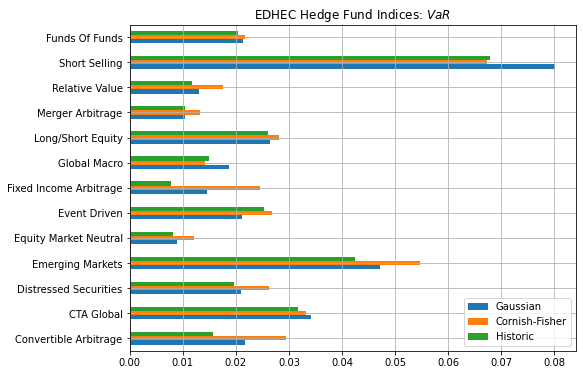

In [95]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historic"]
comparison.plot.barh(
    title="EDHEC Hedge Fund Indices: $VaR$",
    figsize=(8, 6),
    grid=True
)

##### BeyondVaR ou CVaR

In [96]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64